## MLChem Lab2 2021/10/13

### 1. Review NumPy Usage

#### Generate random NumPy array

In [1]:
import numpy as np

# Set random seed
np.random.seed(20211013)

lowlim = 0       # Lower limit
upplim = 10000   # Upper limit
N = 10000        # Sample size
# Generate N random floating numbers in [lowlim, upplim]
X = np.random.random(N) * (upplim - lowlim) + lowlim
# Generate normal distribution data series with mu=0 and sigma=1
X = np.random.normal(0, 1, N)
# Generate N random integers in range [lowlim, upplim)
X = np.random.randint(lowlim, upplim, N)

#### Numpy array slice

In [2]:
# --- Slice by index ---
# Get the first 1000 elements of X
X_fist1k = X[:1000]   # Or X[0:1000], X[0:1000:1]
# Get the last 1000 elements of X
X_last1k = X[-1000:]   # Or X[9000:], X[9000:10000]
# Get 1000 elements in the middle of X
X_middle1k = X[4500:5500]
# Get odd index elements of X
X_odd = X[1::2]   # Or X[1:10000:2]
# Get even index elements of X
X_even = X[::2]   # Or X[0::2], X[0:10000:2]

# -*- Slice by conditions -*-
one_third = lowlim + round((upplim - lowlim) / 3)
two_thirds = upplim - round((upplim - lowlim) / 3)

# Get elements of X which are less than one_third
"""
X < one_third generates a boolean array B[N]
B[i] = X[i] < one_third
X[B] extracts every X[i] that B[i] is True

For example, with one_third = 3333
X
|  7113 |  4424 |  8513 |  3116 |  8809 |  1849 |
B
| False | False | False |  True | False |  True |
X[B]
|  3116 |  1849 |
"""
lower_third = X[X < one_third]

# Divide X series into three parts
middle_third = X[(X >= one_third) & (X < two_thirds)]
higher_third = X[X >= two_thirds]

# Summations
odd_ratios, even_ratios, part_sizes = [], [], []
for part in [lower_third, middle_third, higher_third]:
    part_sizes.append(part.size)
    even_ratio = part[part %2 == 0].size / part.size
    odd_ratios.append(1 - even_ratio)
    even_ratios.append(even_ratio)

### 2. Matplotlib Draw Charts

#### Draw subplots

In [3]:
import matplotlib.pyplot as plt

"""
plt.subplots creates a figure and a set of subplots
Parameters:
    nrows: Number of rows of the subplot grid.
    ncols: Number of columns of the subplot grid.
    **fig_kw: Additional keyword arguments to create the figure.
Returns:
    fig: Figure created.
    ax: array of Axes.
DOC: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
    
For example, plt.subplots(2, 2) creates a figure with 4 subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
| ax1 | ax2 |
| ax3 | ax4 |
"""

# Create a figure with 2 subplots
# Set figure size to 9 x 4.5 (unit: inches), set dpi to 320
# Figure size is 2880 x 1440 (unit: pixels)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9., 4.5), dpi=320)

#### Draw bar + pie charts

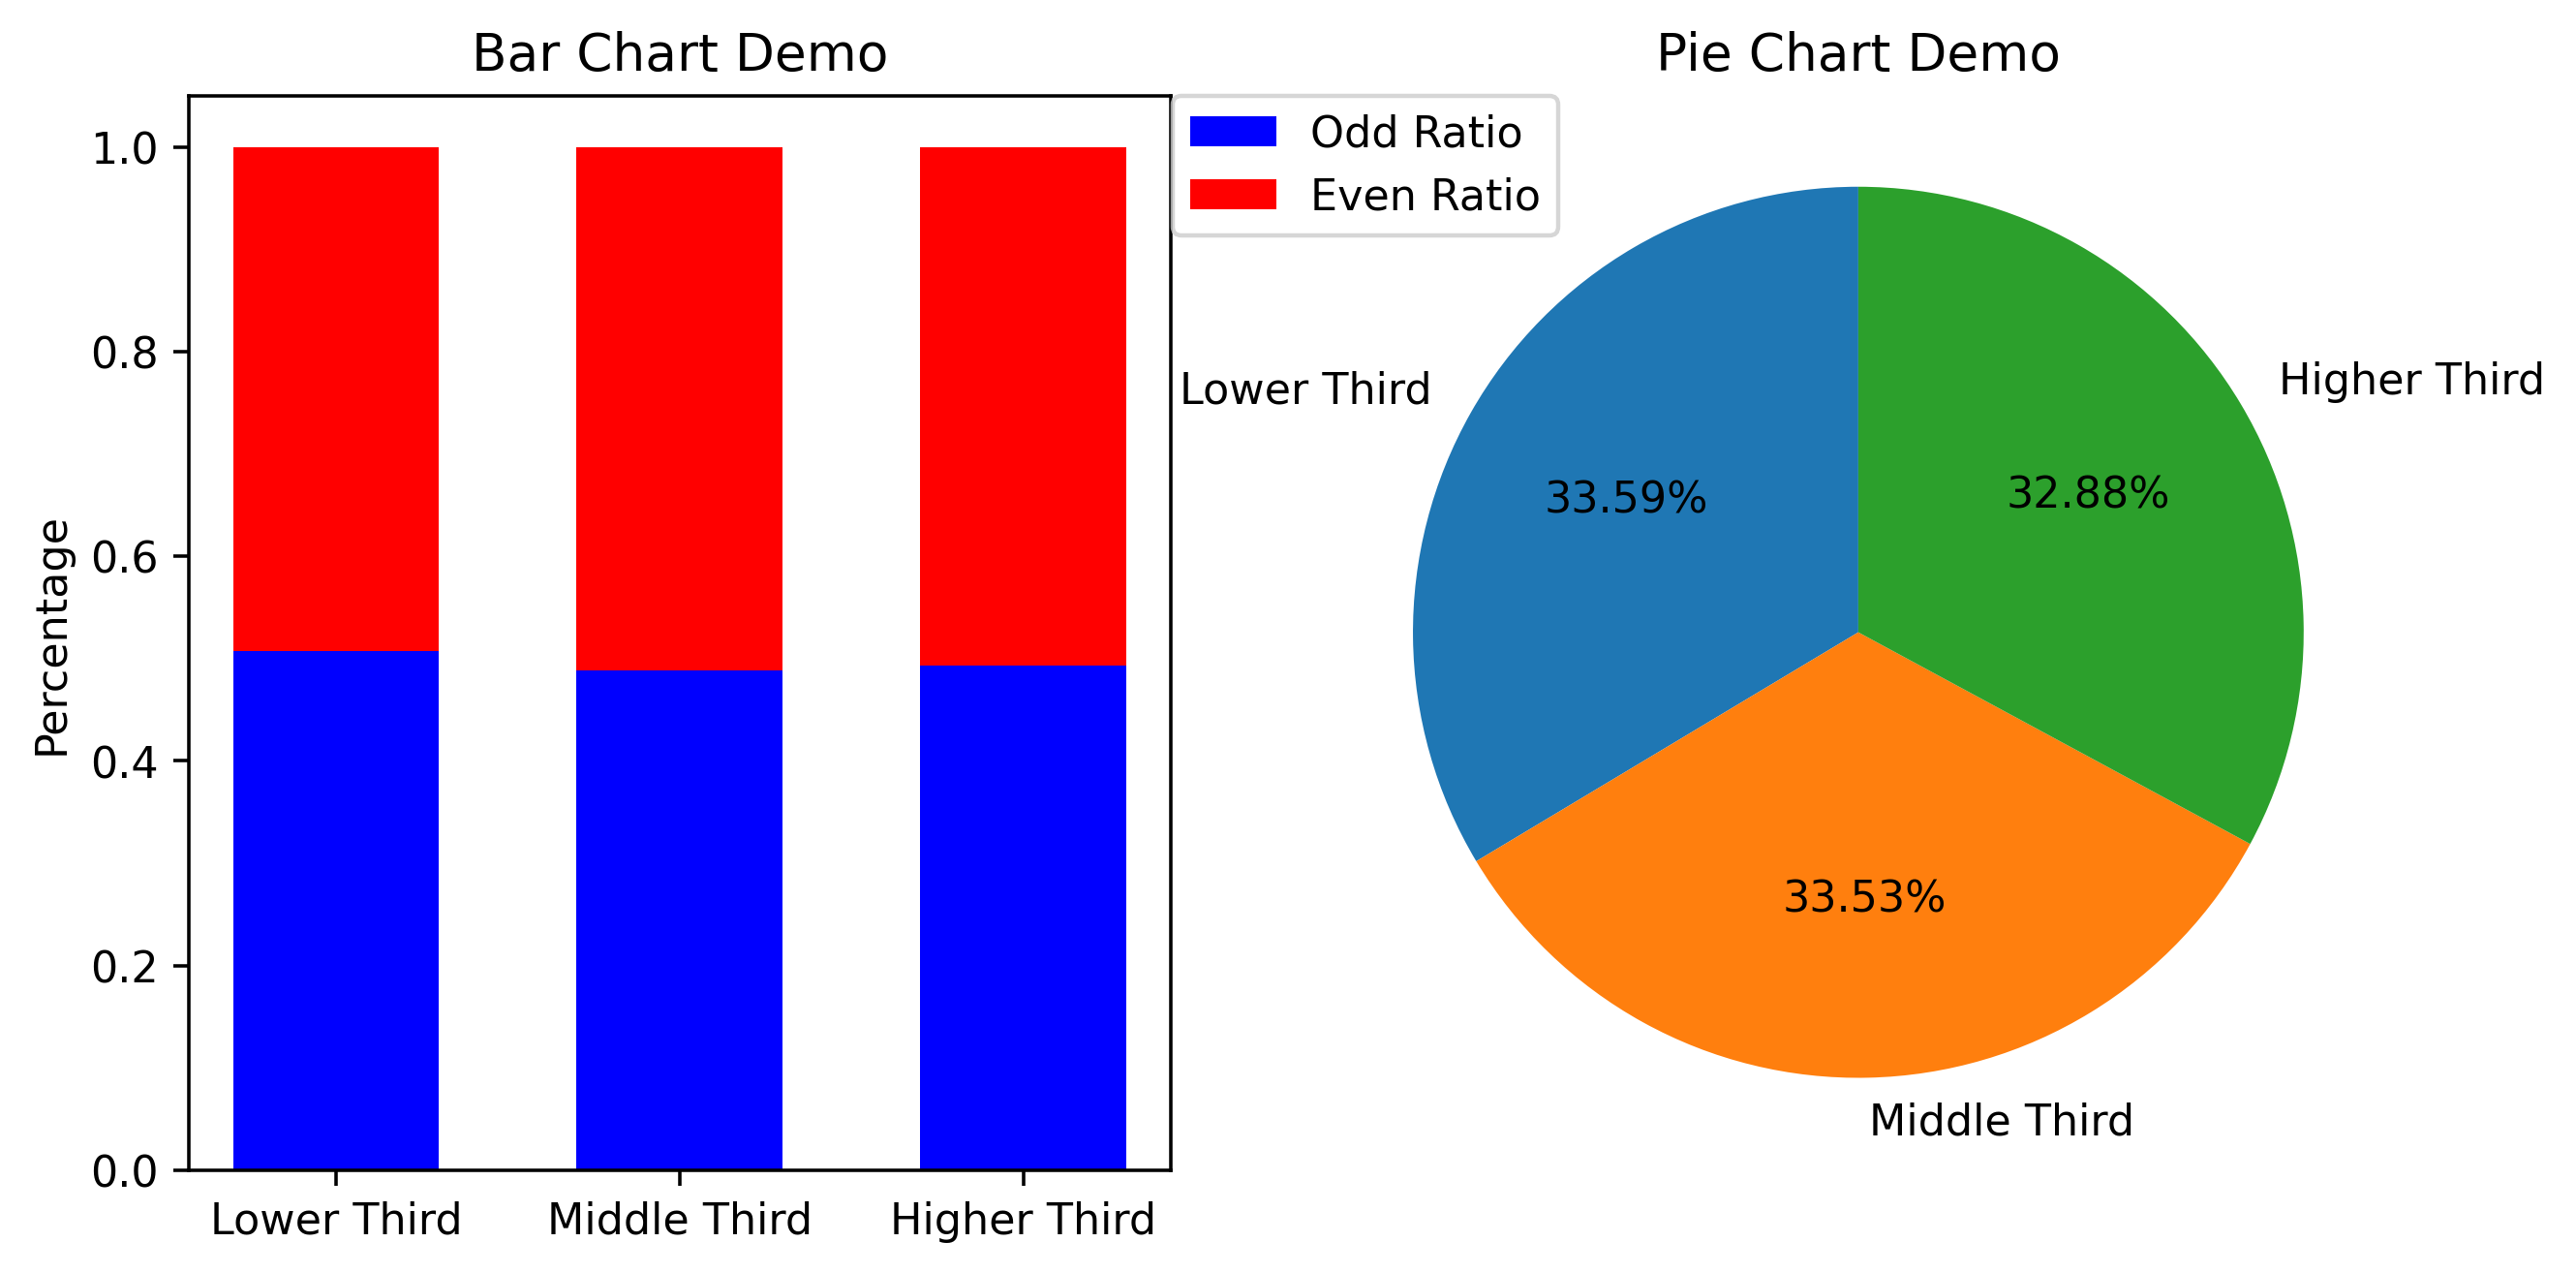

In [4]:
# -*- Draw subplot 1 -*-
# Set main ticks locations in x-axis
xlocs = np.arange(0.5, 3.5)

# Draw blue bars
ax1.bar(xlocs, odd_ratios, 0.6, 0., color="blue", label="Odd Ratio")

# Draw red bars
ax1.bar(xlocs, even_ratios, 0.6, odd_ratios, color="red", label="Even Ratio")

# Set subplot details
ax1.set_title("Bar Chart Demo")
ax1.set_ylabel("Percentage")
ax1.set_xticks(xlocs)
ax1.set_xticklabels(["Lower Third", "Middle Third", "Higher Third"])
ax1.legend(bbox_to_anchor=(.98, 1.02))

# -*- Draw subplot 2 -*-
ax2.pie(part_sizes, labels=["Lower Third", "Middle Third", "Higher Third"], autopct="%.2f%%", startangle=90)
ax2.set_title("Pie Chart Demo")
ax2.axis('equal')   # Draw pie chart as a circle

plt.show()

#### Draw boxplot

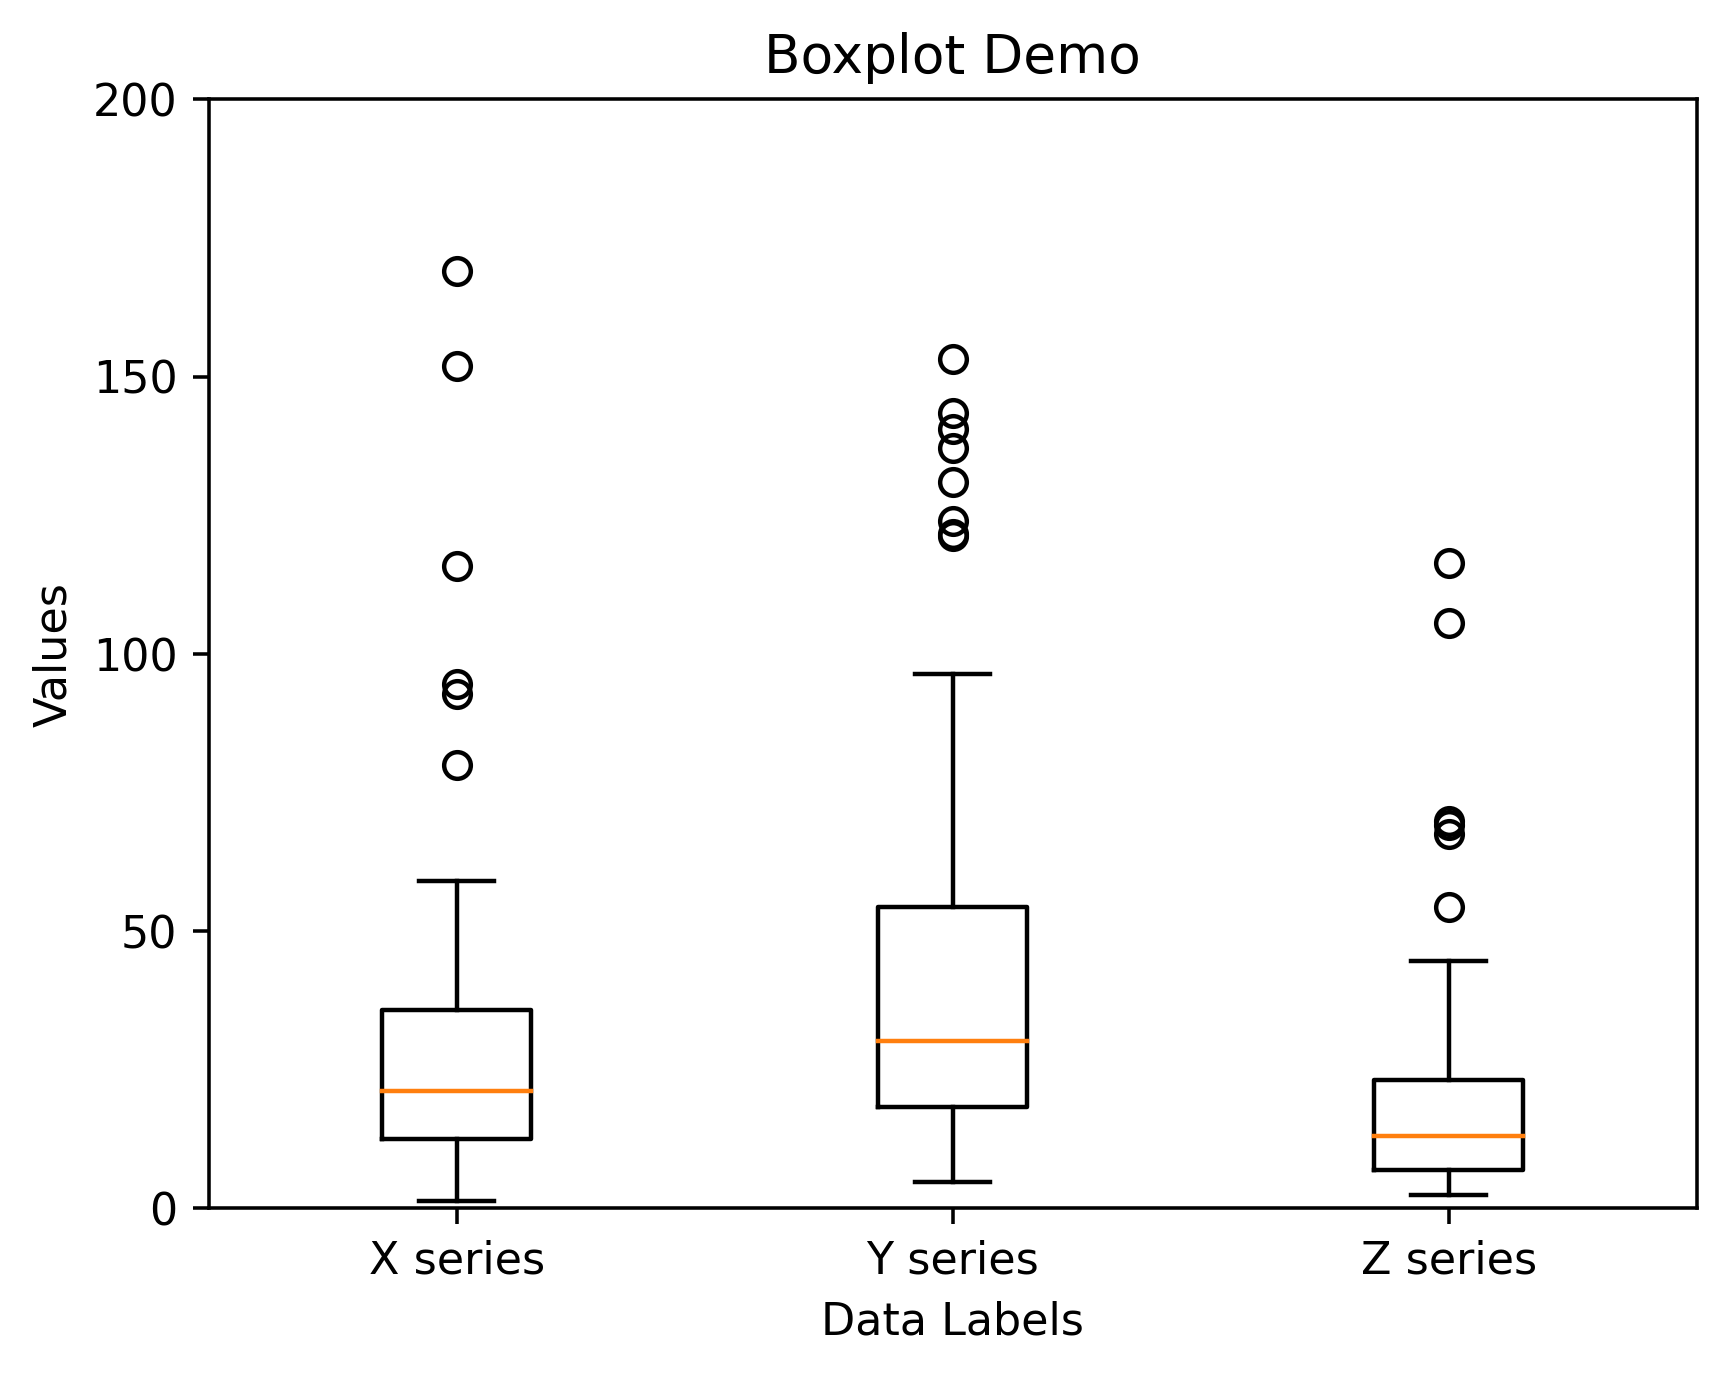

In [5]:
N = 100   # Sample size

# Generate lognormal distribution data series
x_ = np.random.lognormal(3., 1., N)      # mean=3.0, sigma=1.0
y_ = np.random.lognormal(3.4, .95, N)    # mean=3.4, sigma=0.95
z_ = np.random.lognormal(2.6, 1.05, N)   # mean=2.6, sigma=1.05

plt.close()
plt.figure(figsize=(6, 4.5), dpi=320)

# Draw boxplot
# DOC: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html
plt.boxplot([x_, y_, z_], labels=["X series", "Y series", "Z series"])
plt.title("Boxplot Demo")
plt.ylim(0, 200)
plt.yticks(np.linspace(0, 200, 5))
plt.xlabel("Data Labels")
plt.ylabel("Values")
plt.show()

#### Boxplot meanings
![boxplot-desc](boxplot_explanation.webp)

### 3. Pandas Basic Usage

#### Read CSV file to DataFrame

In [6]:
import pandas as pd

df = pd.read_csv("../data/train.csv")
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


#### Grep columns from DataFrame

In [7]:
df["id"]   # Grep one column

0              1
1              2
2              3
3              4
4              5
           ...  
381104    381105
381105    381106
381106    381107
381107    381108
381108    381109
Name: id, Length: 381109, dtype: int64

In [8]:
df[["Gender", "Age"]]   # Grep several columns

,Gender,Age
0,Male,44
1,Male,76
2,Male,47
3,Male,21
4,Female,29
...,...,...
381104,Male,74
381105,Male,30
381106,Male,21
381107,Female,68


#### Discrete text variables to numerical variables

In [9]:
def transform(df, key):
    """Transform discrete text variables to numbers

    Each unique text terms in the discrete text column is assigned to a unique 
    number, or its rank in the series. The more the text term appears in the 
    series, the higher the value of its rank.

    Arguments:
        df: Pandas DataFrame to transform.
        key: Key of the discrete text column.

    Returns:
        A new Pandas DataFrame with data series specified by 'key' transformed. 
    """

    # Get count of the occurrences of 'key' series
    # And sort the series by occurrences in ascending order
    counts = df.groupby(key)[key].count().sort_values()

    rank = 1
    rank_dict = {}
    for text, _ in counts.iteritems():
        rank_dict.update({text: rank})
        rank += 1

    return df.replace({key: rank_dict})

df = transform(df, "Gender")
df = transform(df, "Vehicle_Age")
df = transform(df, "Vehicle_Damage")
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,2,44,1,28.0,0,1,2,40454.0,26.0,217,1
1,2,2,76,1,3.0,0,3,1,33536.0,26.0,183,0
2,3,2,47,1,28.0,0,1,2,38294.0,26.0,27,1
3,4,2,21,1,11.0,1,2,1,28619.0,152.0,203,0
4,5,1,29,1,41.0,1,2,1,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,2,74,1,26.0,1,3,1,30170.0,26.0,88,0
381105,381106,2,30,1,37.0,1,2,1,40016.0,152.0,131,0
381106,381107,2,21,1,30.0,1,2,1,35118.0,160.0,161,0
381107,381108,1,68,1,14.0,0,1,2,44617.0,124.0,74,0


### 4. Split dataset

#### Split train and test datasets (0.8 : 0.2)

In [10]:
from sklearn.model_selection import train_test_split

"""
train_test_split: Split arrays or matrices into random train and test subsets
Parameters:
    test_size: Can be float between 0.0 and 1.0, representing the proportion of the dataset to include
               in the test split.
    shuffle: Whether or not to shuffle the data before splitting.
DOC: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
"""

from sklearn.datasets import load_breast_cancer

# Load breast cancer dataset from scikit-learn
"""
The breast cancerdataset is a classic and simple binary classification dataset.
It has 2 classes: malignant and benign. It has 569 samples in total, with 212 samples in malignant
and 357 samples in benign.
It has 30 features. All features are positive real number.
Detailes are listed in page https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html
"""
X, y = load_breast_cancer(return_X_y=True)

X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
print(f"""X Train Shape = {X_train_valid.shape}
y Train Shape = {y_train_valid.shape}
X Test Shape = {X_test.shape}
y Test Shape = {y_test.shape}""")

X Train Shape = (455, 30)
y Train Shape = (455,)
X Test Shape = (114, 30)
y Test Shape = (114,)


#### Split train, valid and test datasets (0.6 : 0.2 : 0.2)

In [11]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.25, shuffle=True)
print(f"""X Train Shape = {X_train.shape}
y Train Shape = {y_train.shape}
X Valid Shape = {X_valid.shape}
y Valid Shape = {y_valid.shape}""")

X Train Shape = (341, 30)
y Train Shape = (341,)
X Valid Shape = (114, 30)
y Valid Shape = (114,)


### 5. Logistic Regression

#### Feature Engineering

<Figure size 1920x1440 with 0 Axes>

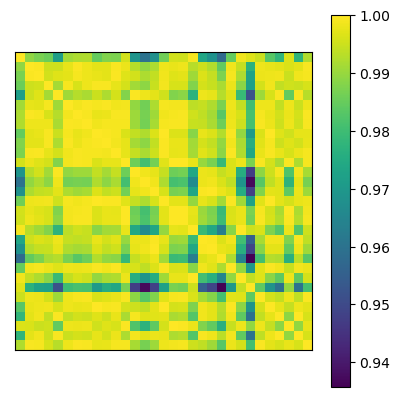

In [12]:
# -*- Based on Pearson correlation -*-
from scipy.stats import pearsonr

X_y = np.hstack([y.reshape(-1, 1), X])
nfeature = X_y.shape[1]

# Compute Pearson correlation coefficient matrix
# It should be a symmetric matrix, so only compute the upper half
corrmat = np.ones((nfeature, nfeature), dtype=float)
for i in range(nfeature):
    for j in range(i + 1, nfeature):
        corrmat[j,i] = corrmat[i,j] = pearsonr(X_y[i], X_y[j])[0]
        
# Display Pearson correlation coefficient matrix with colorbar
plt.figure(figsize=(6, 4.5), dpi=320)
plt.matshow(corrmat)
plt.xticks([])
plt.yticks([])
plt.colorbar()
plt.show()

In [13]:
# -*- Based on chi-squared test -*-
from sklearn.feature_selection import SelectKBest, chi2

feature_X = SelectKBest(chi2, k=5).fit_transform(X, y)
print(f"Featurized X Shape = {feature_X.shape}")

Featurized X Shape = (569, 5)


#### Logistic Regression Classifier

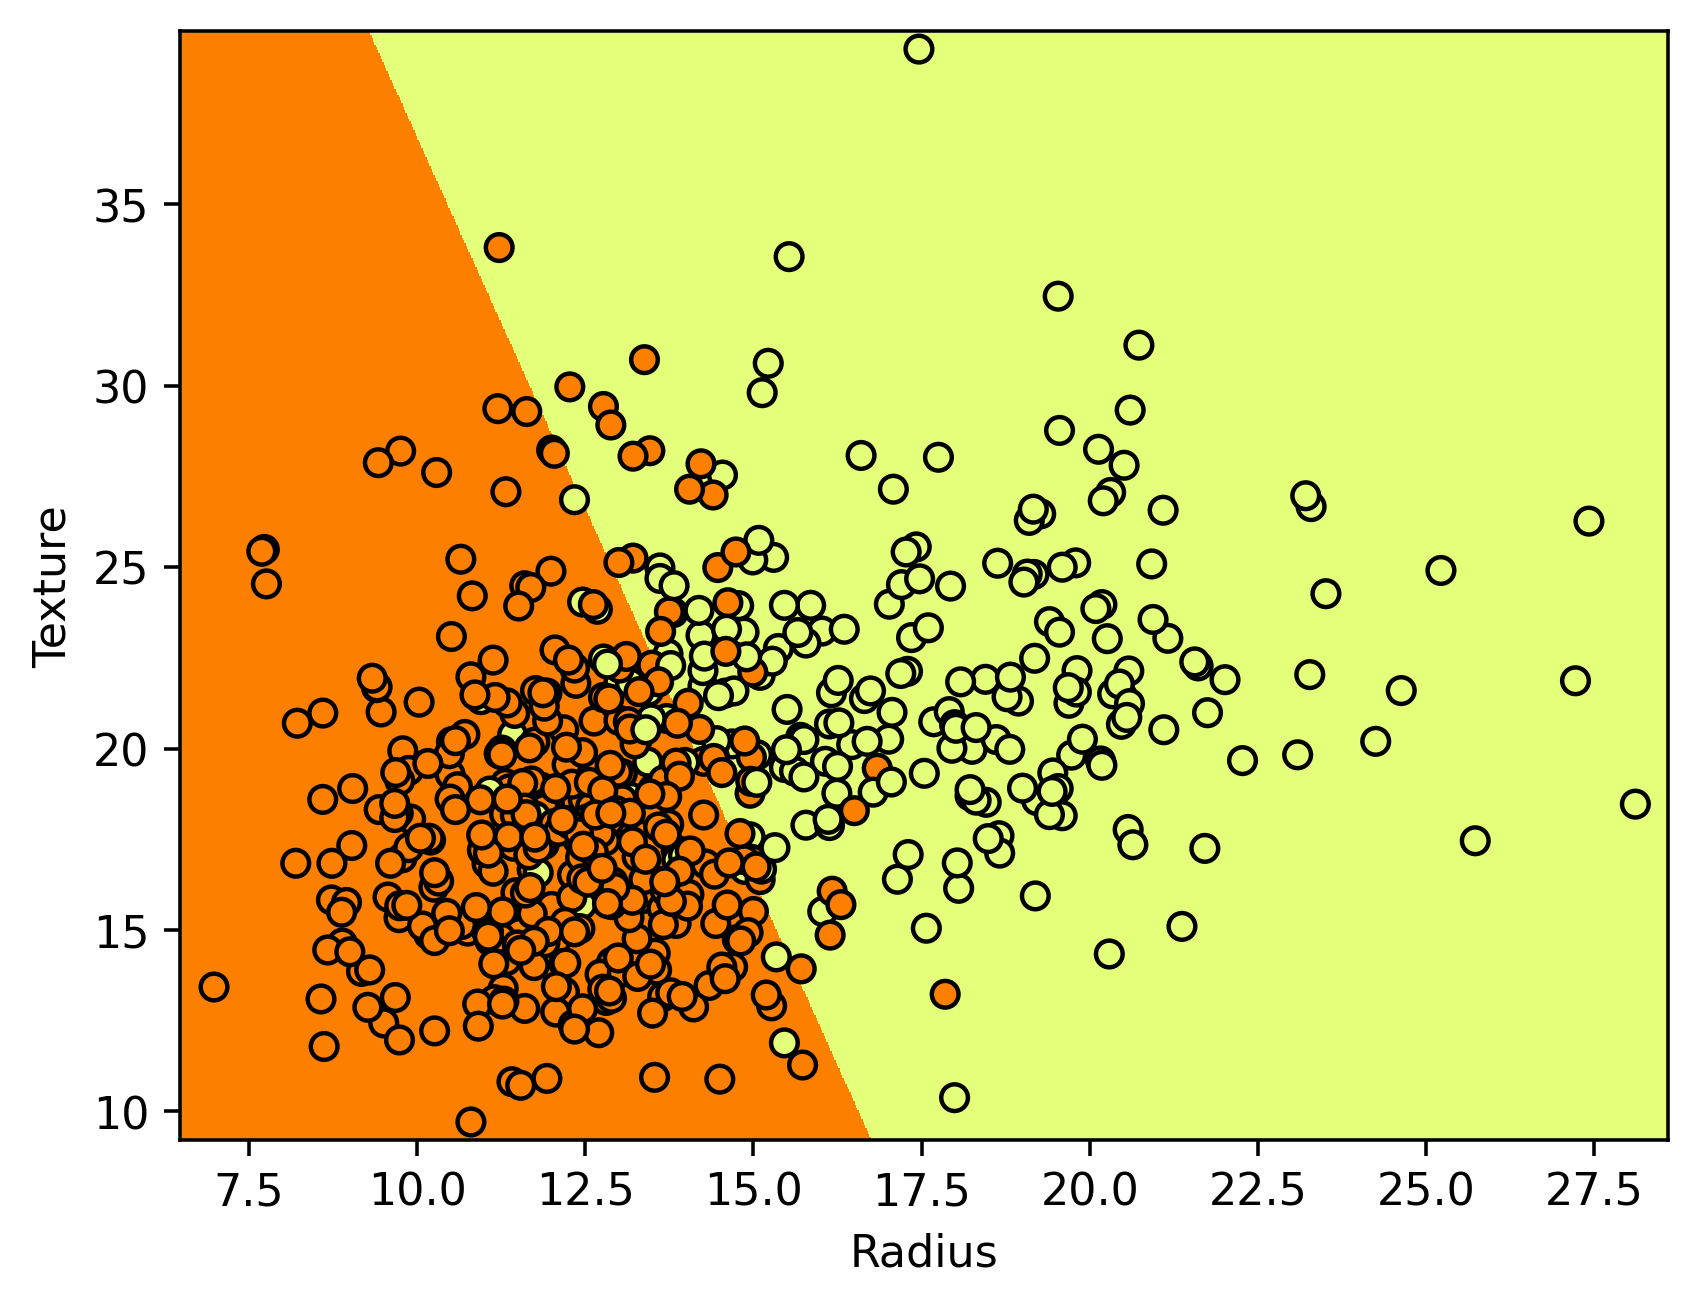

In [14]:
from sklearn.linear_model import LogisticRegression

"""
LogisticRegression: Logistic Regression classifier.
Parameters:
    solver: Algorithm to use in the optimization problem.
            - For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.
            - For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;
            - ‘liblinear’ is limited to one-versus-rest schemes.
    penalty: Specify the norm of the penalty.
            - 'none': no penalty is added
            - 'l2': add a L2 penalty term;
            - 'l1': add a L1 penalty term;
            - 'elasticnet': both L1 and L2 penalty terms are added.
    C: Inverse of regularization strength. Smaller values specify stronger regularization.
    class_weight: Weights associated with label classes.
                  The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to
                  class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).
DOC: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
"""


# Create an instance of Logistic Regression Classifier
model = LogisticRegression(solver="lbfgs", penalty="l2", C=1.0, class_weight="balanced")
model.fit(X_train[:, :2], y_train)

# Code source: Gaël Varoquaux
# Modifier by: Pengbo Song
# Plot the decision boundary
b = .5   # Padding length in the boundary
h = .02  # Step size in the mesh grid
xx, yy = np.meshgrid(
    np.arange(X[:, 0].min() - b, X[:, 0].max() + b, h),
    np.arange(X[:, 1].min() - b, X[:, 1].max() + b, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)   # Prediction in mesh grid

plt.figure(figsize=(6, 4.5), dpi=320)
plt.pcolormesh(xx, yy, Z, shading="auto", cmap=plt.cm.Wistia)   # Plot mesh grid with color map
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="black", cmap=plt.cm.Wistia)   # Plot points in dataset
plt.xlabel("Radius")   # Mean of distances from center to points on the perimeter
plt.ylabel("Texture")  # Standard deviation of gray-scale values
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

### 6. Model Evaluation

#### Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix

"""
Confusion Matrix
|         |          |        True         |
|         |          | Positive | Negative |
| Predict | Positive |    TP    |    FP    |
|         | Negative |    FN    |    TN    |
"""

y_test_pred = model.predict(X_test[:, :2])
cm = confusion_matrix(y_test, y_test_pred)
tn, fp, fn, tp = cm.ravel()
print(f"""Confusion Matrix
{cm}
True Positive = {tp}
False Positive = {fp}
False Negative = {fn}
True Negative = {tn}""")

Confusion Matrix
[[41  2]
 [ 5 66]]
Confusion Matrix
[[41  2]
 [ 5 66]]
True Positive = 66
False Positive = 2
False Negative = 5
True Negative = 41


#### Accuracy, Precision, Recall & F1-Score

In [16]:
from sklearn import metrics

"""
Accuracy  = TP + TN / TP + TN + FP + FN
DOC: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

Precision = TP / TP + FP
DOC: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html

Recall    = TP / TP + FN
DOC: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html

F1-Score  = 2 x Precision x Recall / Precision + Recall
DOC: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
"""

acc = metrics.accuracy_score(y_test, y_test_pred)
precision = metrics.precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test, y_test_pred)
f1 = metrics.f1_score(y_test, y_test_pred)
print(f"""Accuracy = {acc:>.4f}
Precision = {precision:>.4f}
Recall = {recall:>.4f}
F1 = {f1:>.4f}""")

Accuracy = 0.9386
Precision = 0.9706
Recall = 0.9296
F1 = 0.9496


#### ROC Curve & AUC Score

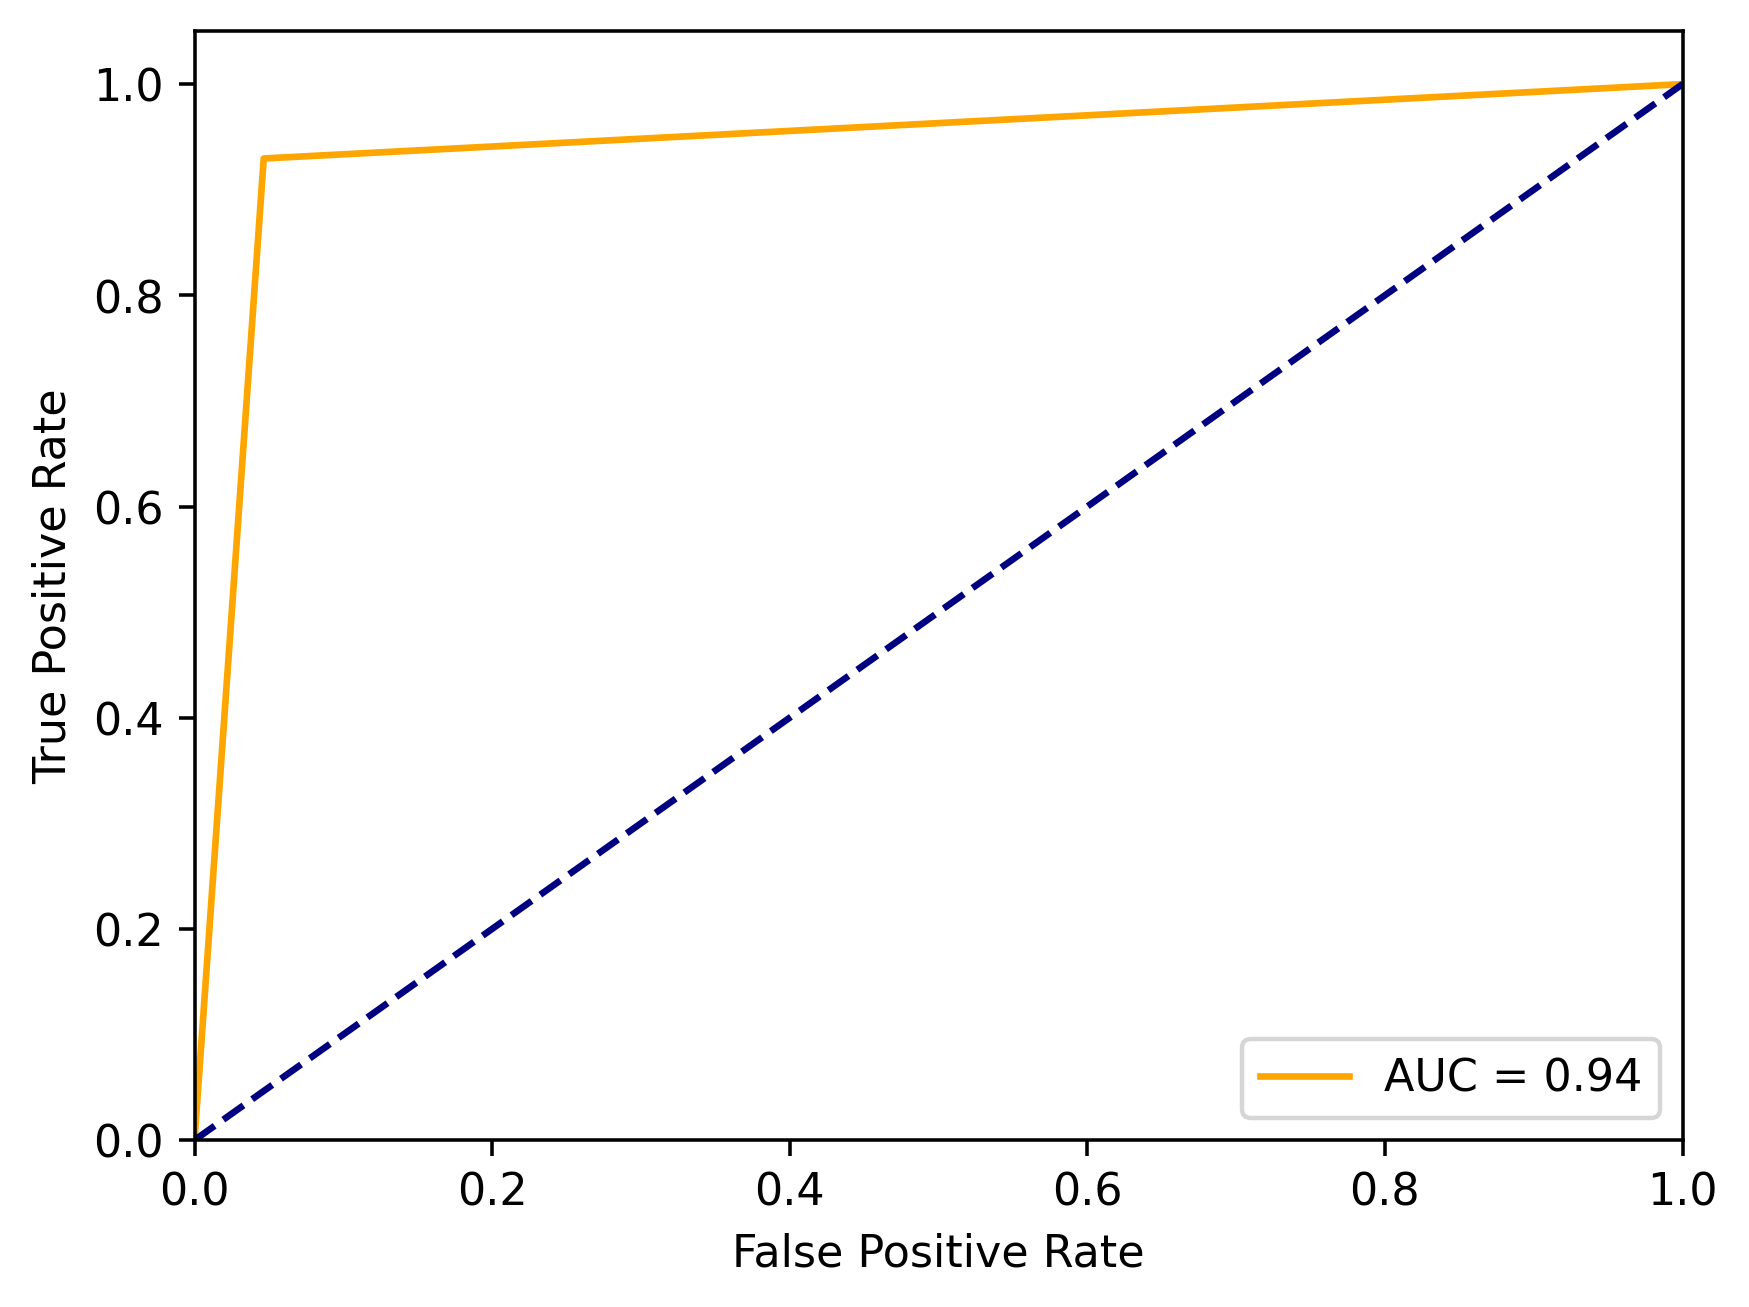

In [17]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, _ = roc_curve(y_test, y_test_pred)
auc = roc_auc_score(y_test, y_test_pred)

plt.figure(figsize=(6, 4.5), dpi=320)
plt.plot(fpr, tpr, color="orange", label="AUC = %.2f" % auc)
plt.plot([0, 1], [0, 1], color="navy", linestyle='--')
plt.xlim([0., 1.])
plt.ylim([0., 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)   # Lower right
plt.show()